In [28]:
#Libraries section
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df.head(3)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74


In [30]:
#specify the predicted variable
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [31]:
#specify the predicting variables
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [32]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train #%80%

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [33]:
x_test #20%

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [34]:
#building the linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train) #train the model on data

LinearRegression()

In [35]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
#y_lr_train_pred
#y_lr_test_pred

In [36]:
#LR model performance evaluation
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [37]:
# Building the Random Forest Model
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [38]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
#y_rf_train_pred
#y_rf_test_pred 

In [39]:
#RF model performance evaluation
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [40]:
#df_results = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_mae, lr_train_r2, lr_test_mse, lr_test_mae, lr_test_r2]).transpose()
results.columns = ['Method', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
results.loc[len(results)] = ['Random Forest', rf_train_mse, rf_train_mae, rf_train_r2, rf_test_mse, rf_test_mae, rf_test_r2]
results

,Method,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Linear Regression,1.007536,0.771699,0.764505,1.020695,0.77983,0.789162
1,Random Forest,1.028228,0.80651,0.759669,1.407688,0.931054,0.709223


[]

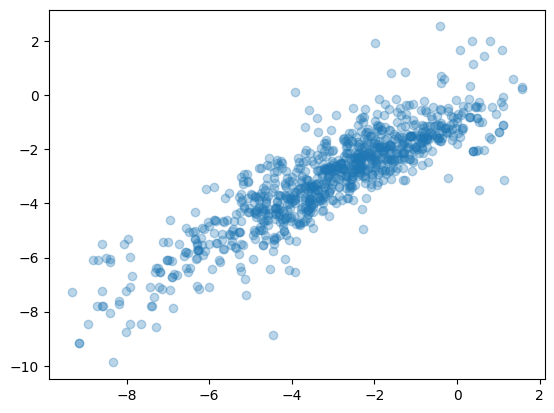

In [42]:
#Data Visualization
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
plt.plot()

[]

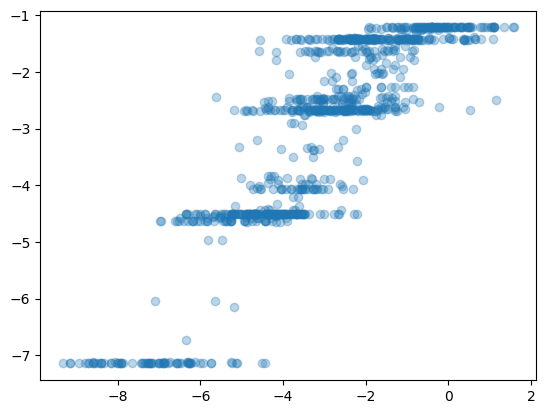

In [43]:
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3)
plt.plot()

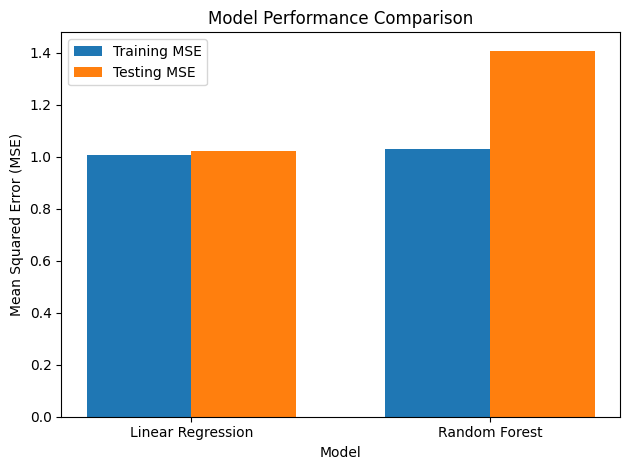

In [46]:
# Bar width and x-axis positions
bar_width = 0.35
x = range(len(results['Method']))

# Plot Training MSE and Testing MSE for comparison
plt.bar(x, results['Training MSE'], width=bar_width, label='Training MSE')
plt.bar([p + bar_width for p in x], results['Testing MSE'], width=bar_width, label='Testing MSE')

# Labels and legend
plt.xticks([p + bar_width / 2 for p in x], results['Method'])  # Center the x-axis labels
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
